# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [5]:
#Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

#Matriz de transformação
m = np.array([[ .5,-1],
              [ .5, 1]])

#Transformação linear
df[['media','diferenca']] = df[['p1','p2']].dot(m)
df.head()

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


In [6]:
#Calcule a correlação entre os dados da p1 e p2

df[['p1','p2']].corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [8]:
#Calcule a correlação entre os dados transformados (média e diferença)

df[['media','diferenca']].corr()

,media,diferenca
media,1.000000,0.133474
diferenca,0.133474,1.000000


In [ ]:
# Comente as correlações observadas.

Os valores de p1 e p2 apresentam uma maior correlação, devido ao fato de pertencerem a um conjunto mais limitado (0 a 10), o que faz com que os valores em geral não variem muito e sigam uma tendência conforme o aluno. 
Devido ao fato da diferença poder variar mais, apresentando valores positivos ou negativos, a correlação com a média, que também varia de 0 a 10 é menor, não sendo óbvio prever a relação entre esses. 

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [9]:
#Matriz de transformação
m2 = np.array([[ 1,-1],
              [ 1, 1]])

#Transformação linear
df[['soma','diferenca']] = df[['p1','p2']].dot(m2)
df.head()

,p1,p2,media,diferenca,soma
0,6.964692,7.943428,7.454060,0.978736,14.908120
1,2.861393,5.099537,3.980465,2.238143,7.960930
2,2.268515,0.974429,1.621472,-1.294085,3.242944
3,5.513148,4.474359,4.993754,-1.038788,9.987507
4,7.194690,8.938402,8.066546,1.743712,16.133092


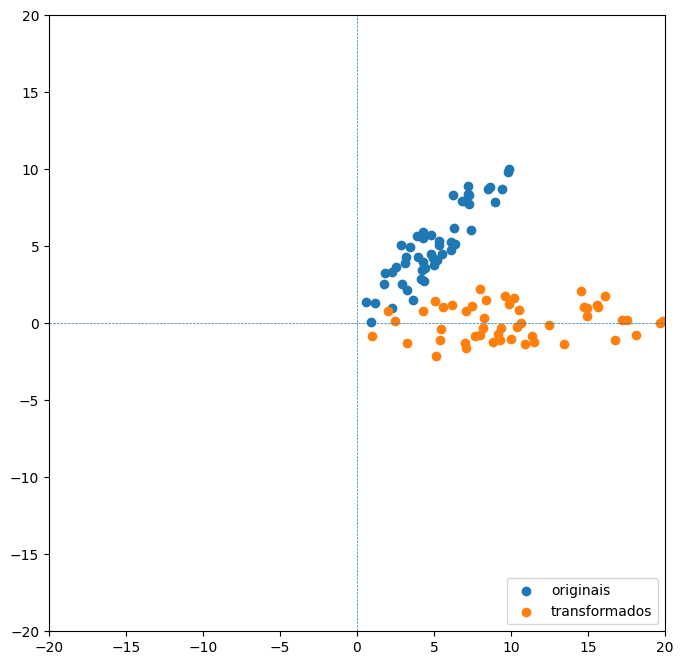

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

xmin = -20
xmax = 20
ymin = -20
ymax = 20

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df['soma'], df['diferenca'], label='transformados')

plt.legend(loc='lower right')

Os vetores transformados são maiores em dimensão, devido à componente da soma. Possuem valores positivos e negativos em relação ao eixo y devido à diferença. Enquanto os originais são todos positivos nos 2 eixos e menores. 